# Tensorflow-Regression

In [54]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
np.random.seed(101)
tf.set_random_seed(101)

In [4]:
rand_a = np.random.uniform(0, 100, (5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [5]:
rand_b = np.random.uniform(0, 100, (5,5))
rand_b

array([[99.43179012, 52.06653967, 57.87895355, 73.48190583, 54.19617722],
       [91.31535577, 80.7920151 , 40.29978307, 35.72243428, 95.28767147],
       [34.36315779, 86.50998163, 83.02777122, 53.81614492, 92.24693726],
       [ 9.71464798, 10.28474932, 70.15072957, 89.04798691, 15.95603009],
       [27.55725449, 67.24915297, 16.4303124 , 70.13711366, 48.76352222]])

In [6]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [7]:
add_op = a + b
mul_op = a * b


In [8]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    mul_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
    
print(add_result)
print('\n')
print(mul_result)

[[151.07166  109.1333    60.726376  90.63407  122.72388 ]
 [174.70505  111.48864  129.66109  107.87682  114.28157 ]
 [ 89.78592  121.723175 101.21701  132.37631  188.79526 ]
 [ 32.950016  18.640892 130.50557  161.94727   43.57991 ]
 [ 96.08789  119.035904  21.278767  83.92404   67.460266]]


[[5134.644    2971.2686    164.80583  1260.3738   3713.9392  ]
 [7614.759    2480.042    3601.2412   2577.5305   1809.884   ]
 [1904.5011   3046.2927   1510.212    4227.8057   8906.287   ]
 [ 225.72342    85.940834 4233.936    6491.534     440.7675  ]
 [1888.5161   3482.615      79.661606  966.97504   911.71906 ]]


#### Simple One Layer Neural Network

In [9]:
n_features = 10
n_dense_neurons = 3

In [10]:
X = tf.placeholder(tf.float32, (None, n_features))
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [11]:
XW = tf.matmul(X, W)
z = tf.add(XW, b)
a = tf.sigmoid(z)

In [12]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={X:np.random.random([1, n_features])})

print(layer_out)

[[0.5571275 0.8654362 0.693713 ]]


#### Simple Regression

In [13]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
x_data

array([-0.17289561,  2.24387308,  3.57001461,  3.26783558,  4.32780247,
        5.96742265,  6.14049066,  6.63051206,  7.54219188, 10.41297596])

In [14]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)
y_label

array([0.93679768, 1.62189237, 2.67752533, 3.10704016, 4.91423045,
       4.68304005, 7.14644022, 7.86664797, 9.63445   , 8.78127057])

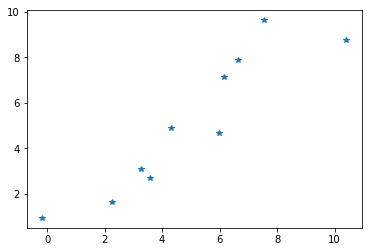

In [16]:
plt.plot(x_data, y_label, "*")

In [17]:
# y = mx + b
np.random.rand(2)

array([0.78452185, 0.68724204])

In [18]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [19]:
error = 0

for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [21]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 1
    
    for i in range(training_steps):
        sess.run(train)
    
    final_slope, final_intercept = sess.run([m,b])

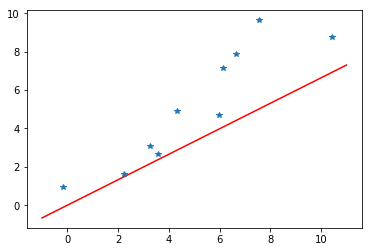

In [22]:
x_test = np.linspace(-1, 11, 10)

y_pred_plot = final_slope * x_test * final_intercept

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')

In [24]:
x_data = np.linspace(0.0, 10.0, 10000000)
noise = np.random.randn(len(x_data))

In [25]:
y_true = (0.5 * x_data) + 5 + noise

In [26]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [27]:
x_df.head()

,X Data
0,0.000000
1,0.000001
2,0.000002
3,0.000003
4,0.000004


In [28]:
y_df.head()

,Y
0,4.968840
1,6.939933
2,3.994814
3,4.258212
4,5.187127


In [29]:
my_data = pd.concat([x_df, y_df], axis=1)

In [30]:
my_data.head()

,X Data,Y
0,0.000000,4.968840
1,0.000001,6.939933
2,0.000002,3.994814
3,0.000003,4.258212
4,0.000004,5.187127


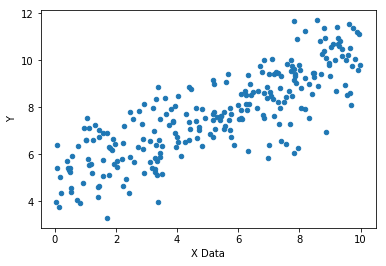

In [32]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [42]:
np.random.randn(2)

batch_size = 8
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [43]:
x_ph = tf.placeholder(tf.float32, [batch_size])
y_ph = tf.placeholder(tf.float32, [batch_size])

In [44]:
y_model = m*x_ph + b

In [45]:
error = tf.reduce_sum(tf.square(y_ph-y_model))

In [46]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [47]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {x_ph: x_data[rand_ind], y_ph:y_true[rand_ind]}
        sess.run(train, feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])
    

In [48]:
print(model_m)
print(model_b)

0.48376098
4.8531246


In [49]:
y_hat = x_data*model_m + model_b

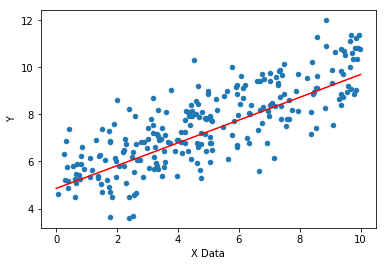

In [50]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')

### TF Estimator Api

In [52]:
feature_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [53]:
estimator = tf.estimator.LinearRegressor(feature_columns=feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp95bv44m8', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [57]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(7000000,) (7000000,)
(3000000,) (3000000,)


In [62]:
input_function = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=None,shuffle=True)
train_input_function = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=1000,shuffle=False )
train_test_function = tf.estimator.inputs.numpy_input_fn({'x':x_test}, y_test, batch_size=8, num_epochs=1000,shuffle=False )

In [63]:
estimator.train(input_fn=input_function, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tmp95bv44m8/model.ckpt-1000
INFO:tensorflow:Saving checkpoints for 1001 into /tmp/tmp95bv44m8/model.ckpt.
INFO:tensorflow:loss = 5.27495, step = 1001
INFO:tensorflow:global_step/sec: 1490.42
INFO:tensorflow:loss = 5.127598, step = 1101 (0.069 sec)
INFO:tensorflow:global_step/sec: 1398.53
INFO:tensorflow:loss = 1.1607944, step = 1201 (0.071 sec)
INFO:tensorflow:global_step/sec: 1264.69
INFO:tensorflow:loss = 12.597054, step = 1301 (0.079 sec)
INFO:tensorflow:global_step/sec: 1278.77
INFO:tensorflow:loss = 7.2513723, step = 1401 (0.078 sec)
INFO:tensorflow:global_step/sec: 1341.13
INFO:tensorflow:loss = 6.4879413, step = 1501 (0.074 sec)
INFO:tensorflow:global_step/sec: 1495.73
INFO:tensorflow:loss = 14.501667, step = 1601 (0.067 sec)
INFO:tensorflow:global_step/sec: 1231.7
INFO:tensorflow:loss = 5.2650175, step = 1701 (0.081 sec)
INFO:tensorflow:global_step/sec: 1477.24
INFO:tensorflow:loss = 6.15

In [64]:
train_metrics = estimator.evaluate(input_fn=train_input_function, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-01-21-13:29:00
INFO:tensorflow:Restoring parameters from /tmp/tmp95bv44m8/model.ckpt-2000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1000]
INFO:tensorflow:Evaluati

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [65]:
eval_metrics = estimator.evaluate(input_fn=train_test_function, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-01-21-13:30:03
INFO:tensorflow:Restoring parameters from /tmp/tmp95bv44m8/model.ckpt-2000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1000]
INFO:tensorflow:Evaluati

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [66]:
print('Training Data Metrics')
print(train_metrics)

Training Data Metrics
{'average_loss': 1.0150592, 'loss': 8.120474, 'global_step': 2000}


In [67]:
print('Test Metrics')
print(eval_metrics)

Test Metrics
{'average_loss': 1.0224198, 'loss': 8.1793585, 'global_step': 2000}


In [68]:
new_data = np.linspace(0,10, 10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':new_data}, shuffle=False)

In [69]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /tmp/tmp95bv44m8/model.ckpt-2000


[{'predictions': array([4.918426], dtype=float32)},
 {'predictions': array([5.4961357], dtype=float32)},
 {'predictions': array([6.073845], dtype=float32)},
 {'predictions': array([6.6515546], dtype=float32)},
 {'predictions': array([7.2292643], dtype=float32)},
 {'predictions': array([7.8069735], dtype=float32)},
 {'predictions': array([8.384683], dtype=float32)},
 {'predictions': array([8.962393], dtype=float32)},
 {'predictions': array([9.540102], dtype=float32)},
 {'predictions': array([10.117811], dtype=float32)}]

In [70]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])
predictions

INFO:tensorflow:Restoring parameters from /tmp/tmp95bv44m8/model.ckpt-2000


[array([4.918426], dtype=float32),
 array([5.4961357], dtype=float32),
 array([6.073845], dtype=float32),
 array([6.6515546], dtype=float32),
 array([7.2292643], dtype=float32),
 array([7.8069735], dtype=float32),
 array([8.384683], dtype=float32),
 array([8.962393], dtype=float32),
 array([9.540102], dtype=float32),
 array([10.117811], dtype=float32)]

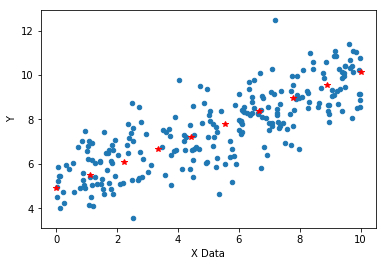

In [72]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(new_data, predictions, 'r*')